In [ ]:
#!pip install python-binance
import datetime 
from binance import Client
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [57]:
API_Key="XXXXXXXXXXXXXXXXXXXX"

Secret_Key="XXXXXXXXXXXXXXXXXXXX"

client = Client(API_Key, Secret_Key)


In [58]:
# Get account details like crypto holds in account
acc_details=client.get_account()
df=pd.DataFrame(acc_details["balances"])
df["free"]=df["free"].astype("float64")
df[df["free"]!=0.0].head()

,asset,free,locked
0,BTC,0.000220,0.00000000
4,BNB,0.011390,0.00000000
11,USDT,0.001565,0.00000000
69,MANA,0.000104,0.00000000
86,ADA,0.000019,0.00000000


In [59]:
def historical_ohlcv(Symbol,timeFrame,start_date=(2018,1,1),end_date=(2022,12,31),want_csv=False):
    """
    Kline/Candlestick chart intervals:
    m -> minutes; h -> hours; d -> days; w -> weeks; M -> months
    1m 3m 5m 15m 30m 1h 2h 4h 6h 8h 12h 1d 3d 1w 1M
    
    """
    col=["datetime","open","high","low","close","volume","Close_time","Quote_asset_volume","Number_of_trades","Taker_buy_base_asset_volume","Taker_buy_quote_asset_volume","Ignore"]
    x=datetime.datetime(start_date[0],start_date[1],start_date[2]).timestamp()
    y=datetime.datetime(end_date[0],end_date[1],end_date[2]).timestamp()
    z=client.get_historical_klines(str(Symbol),interval=str(timeFrame),start_str=str(x),end_str=str(y))
    df=pd.DataFrame(z,columns=col)
    df.set_index(["datetime"],inplace=True)
    df.index=pd.to_datetime(df.index,unit="ms")+datetime.timedelta(minutes=30, hours=5)
    df["open"]=df["open"].astype("float64")
    df["high"]=df["high"].astype("float64")
    df["low"]=df["low"].astype("float64")
    df["close"]=df["close"].astype("float64")
    df["volume"]=df["volume"].astype("float64")
    #df=df[["open","high","low","close","volume"]]
    if want_csv is True :
        df.to_csv("{}_{}.csv".format(Symbol,timeFrame))
    return df
#m=historical_ohlcv("ETHUSDT","1h",start_date=(2018,1,1),end_date=(2021,12,19))

In [60]:
df=historical_ohlcv("BTCUSDT","1d",start_date=(2018,1,1),end_date=(2023,12,31),want_csv=True)
df.head(3)

,open,high,low,close,volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Ignore
datetime,,,,,,,,,,,
2018-01-01 05:30:00,13715.65,13818.55,12750.00,13380.00,8609.915844,1514851199999,114799747.44197057,105595,3961.93894600,52809747.44038045,0
2018-01-02 05:30:00,13382.16,15473.49,12890.02,14675.11,20078.092111,1514937599999,279717107.43371920,177728,11346.32673900,158080088.68331682,0
2018-01-03 05:30:00,14690.00,15307.56,14150.00,14919.51,15905.667639,1515023999999,236116868.33619011,162787,8994.95356600,133587333.24534808,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1849 entries, 2018-01-01 05:30:00 to 2023-01-23 05:30:00
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          1849 non-null   float64
 1   high                          1849 non-null   float64
 2   low                           1849 non-null   float64
 3   close                         1849 non-null   float64
 4   volume                        1849 non-null   float64
 5   Close_time                    1849 non-null   int64  
 6   Quote_asset_volume            1849 non-null   object 
 7   Number_of_trades              1849 non-null   int64  
 8   Taker_buy_base_asset_volume   1849 non-null   object 
 9   Taker_buy_quote_asset_volume  1849 non-null   object 
 10  Ignore                        1849 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 173.3+ KB


In [65]:
df.describe()

,open,high,low,close,volume,Close_time,Number_of_trades
count,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1.849000e+03,1.849000e+03
mean,20296.474938,20851.459708,19662.715430,20301.377096,75098.785891,1.594685e+12,1.372765e+06
std,16876.358460,17348.440918,16328.640044,16875.873538,75335.430090,4.612944e+10,1.709241e+06
min,3211.710000,3276.500000,3156.260000,3211.720000,1521.537318,1.514851e+12,1.241700e+04
25%,7735.670000,7975.000000,7467.050000,7730.930000,34012.242132,1.554768e+12,3.062020e+05
50%,11071.360000,11455.000000,10766.030000,11071.350000,50119.066932,1.594685e+12,7.574580e+05
75%,33502.330000,34666.000000,31915.400000,33502.870000,82406.777448,1.634602e+12,1.613775e+06
max,67525.820000,69000.000000,66222.400000,67525.830000,760705.362783,1.674518e+12,1.453060e+07


In [67]:
df["returns"]=df["close"].pct_change()
df["day"]=df.index.day_name()
df["month"]=df.index.month_name()
df["Year"]=df.index.year
df.head()

,open,high,low,close,volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Ignore,returns,day,month,Year
datetime,,,,,,,,,,,,,,,
2018-01-01 05:30:00,13715.65,13818.55,12750.00,13380.00,8609.915844,1514851199999,114799747.44197057,105595,3961.93894600,52809747.44038045,0,NaN,Monday,January,2018
2018-01-02 05:30:00,13382.16,15473.49,12890.02,14675.11,20078.092111,1514937599999,279717107.43371920,177728,11346.32673900,158080088.68331682,0,0.096794,Tuesday,January,2018
2018-01-03 05:30:00,14690.00,15307.56,14150.00,14919.51,15905.667639,1515023999999,236116868.33619011,162787,8994.95356600,133587333.24534808,0,0.016654,Wednesday,January,2018
2018-01-04 05:30:00,14919.51,15280.00,13918.04,15059.54,21329.649574,1515110399999,312781583.79830782,170310,12680.81295100,186116793.01158931,0,0.009386,Thursday,January,2018
2018-01-05 05:30:00,15059.56,17176.24,14600.00,16960.39,23251.491125,1515196799999,369321956.48683753,192969,13346.62229300,211829900.67898224,0,0.126222,Friday,January,2018


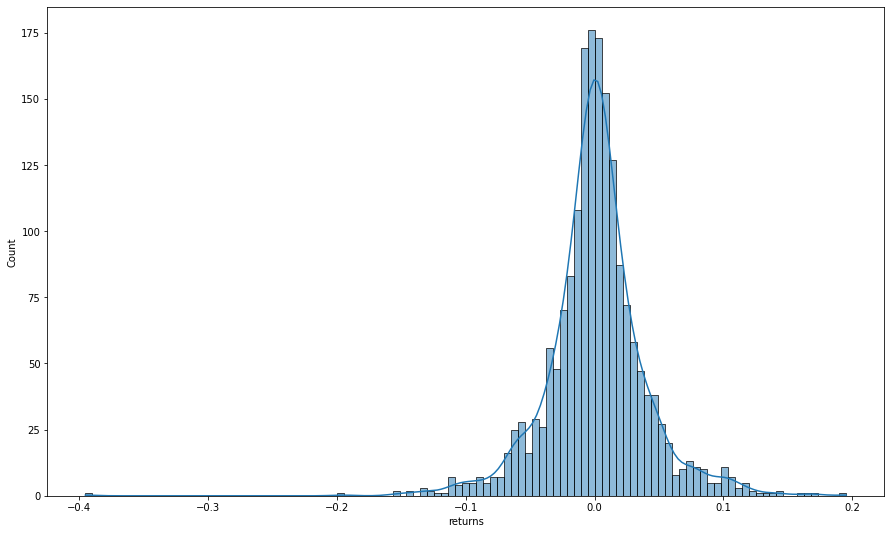

In [70]:
plt.figure(figsize=(15,9))
sns.histplot(df.returns,kde=True);

<AxesSubplot:xlabel='month'>

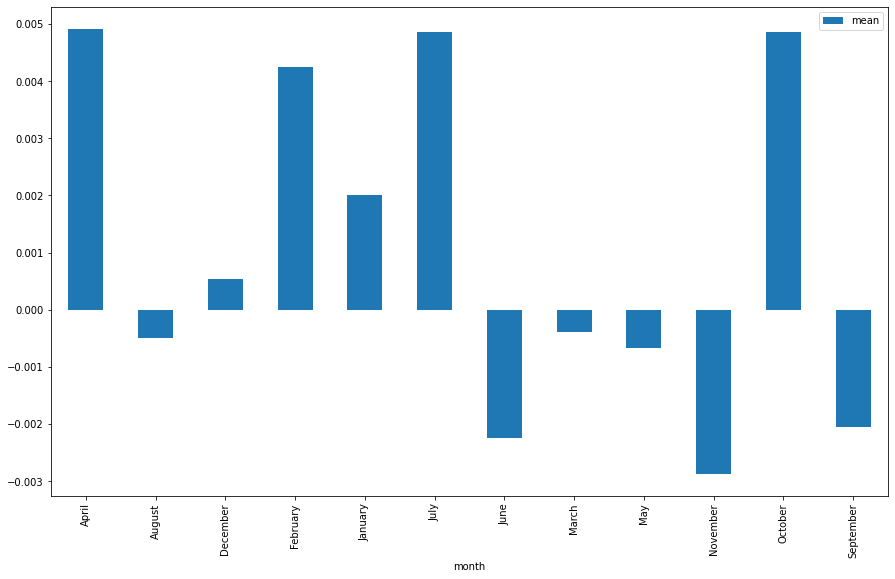

In [82]:
# month-wise avg return
df.groupby(by=["month"])["returns"].agg(["mean"]).plot(figsize=(15,9),rot=90,kind="bar");

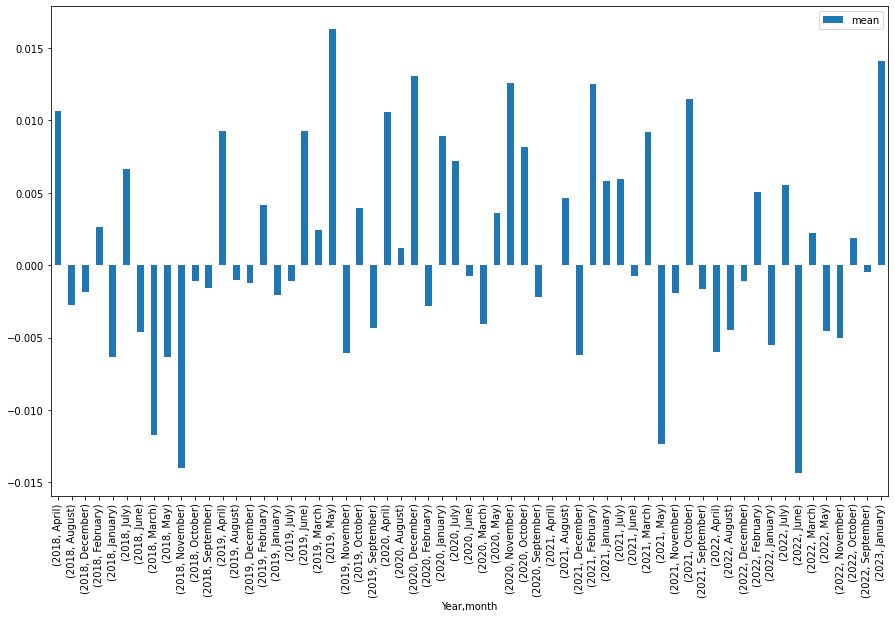

In [83]:
# Year-month-wise avg return
df.groupby(by=["Year","month"])["returns"].agg(["mean"]).plot(figsize=(15,9),rot=90,kind="bar");

<AxesSubplot:xlabel='Year,month'>

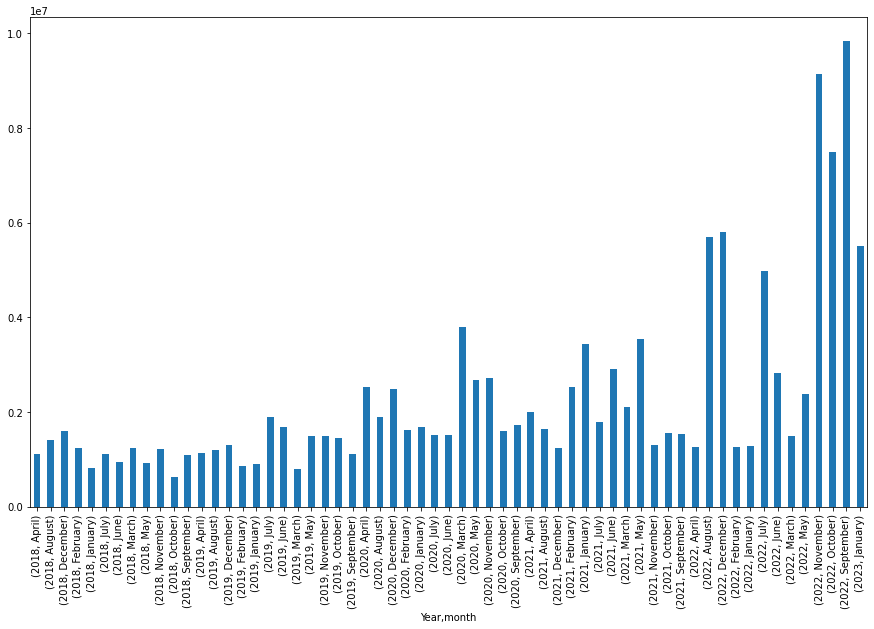

In [95]:
# highest Volume month
df.groupby(by=["Year","month"])["volume"].sum().plot(figsize=(15,9),rot=90,kind="bar")